In [1]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp

%reload_ext autoreload
%autoreload 2

2024-03-21 11:07:12.291948: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

In [3]:
remove_genes = ['IGHM', 'CCL16', 'CCR3','CD3G','TH','NEUROD6','CD4','PLP1']

In [4]:
adata = sc.read_h5ad('../../DataSubmission/GBM_Linnarsson_EEL.h5ad')
adata = adata[:,~adata.var_names.isin(remove_genes)]
#GW_mini high samples
adata = adata[adata.obs.Sample.isin(
        [
            'SL005','SL006','SL011','SL013','SL016A','SL016B','SL019','SL020','SL023','SL029','SL030','SL034','SL035A','SL035B',
            'SL037', 'SL038','SL040B','SL040Bulk','SL040D','SL040E','SL046A','SL046B','SL046C','SL047B','SL057A','SL061A','SL061B']
    )
]

In [6]:
adata.obs['Polygons']

1025896-13-4-0        POLYGON ((18049.085076295552 2612.491991857446...
1025899-13-4-0        POLYGON ((18215.46359144466 3490.7930533055346...
1025900-13-4-0        POLYGON ((18450.40723014653 3603.433819135373,...
1025901-13-4-0        POLYGON ((18358.52963530835 3537.6098197718516...
1025902-13-4-0        POLYGON ((12911.980077054302 2885.666001499213...
                                            ...                        
8871673-25-39-38-1    POLYGON ((8572.711755515496 4886.899930063609,...
8871677-25-39-38-1    POLYGON ((9867.15943493262 3241.242518579531, ...
8871680-25-39-38-1    POLYGON ((5579.551104588072 5464.4954504393345...
8871681-25-39-38-1    POLYGON ((3815.072827080693 4543.222231960488,...
8871704-25-39-38-1    POLYGON ((5574.300255925796 8351.846285125715,...
Name: Polygons, Length: 4234989, dtype: object

In [10]:
adata.obs['m-states'].cat.categories
adata.raw = adata

In [11]:
adata.X = adata.raw.X
#sc.pp.normalize_total(adata)
#sc.pp.log1p(adata)
#sp.pp.preprocess(adata,log=False)

In [12]:

GW_clusters = [
    'GW-like 1', 'GW-like 2','GW-like 3', 'GW-like 4', 'GW-like 5', 'GW-like 6', 'GW-like 7', 'GW-like 8',
    #'AC-like 3',
    #Remove GW_mini2 because seems like a special case
    #'GW_mini-like 2',
]

#GW_mini_clusters = ['GW_mini-like 1', 'GW_mini-like 3', 'GW_mini-like 5', 'GW_mini-like 6', 'GW_mini-like 8']
GW = adata[adata.obs['m-states'].isin(GW_clusters)]
GW = GW[GW.X.sum(axis=1) > 5]
GW.raw = GW

In [13]:
from sklearn.preprocessing import Normalizer
#sp.pp.preprocess(GW_mini,log=False)

sc.pp.filter_genes(GW,min_cells=50)

#scf.pp.batch_correct(GW,batch_key='Sample')
#sc.pp.normalize_total(GW)
GW.X = Normalizer(norm='l2').fit_transform(GW.X)
sc.pp.log1p(GW,base=2)
sc.pp.highly_variable_genes(GW)

#GW=GW[:,GW.var.highly_variable]

sc.pp.scale(GW,)
sc.pp.pca(GW)

In [14]:
(GW.var_names == 'ASCL1').sum()

1

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


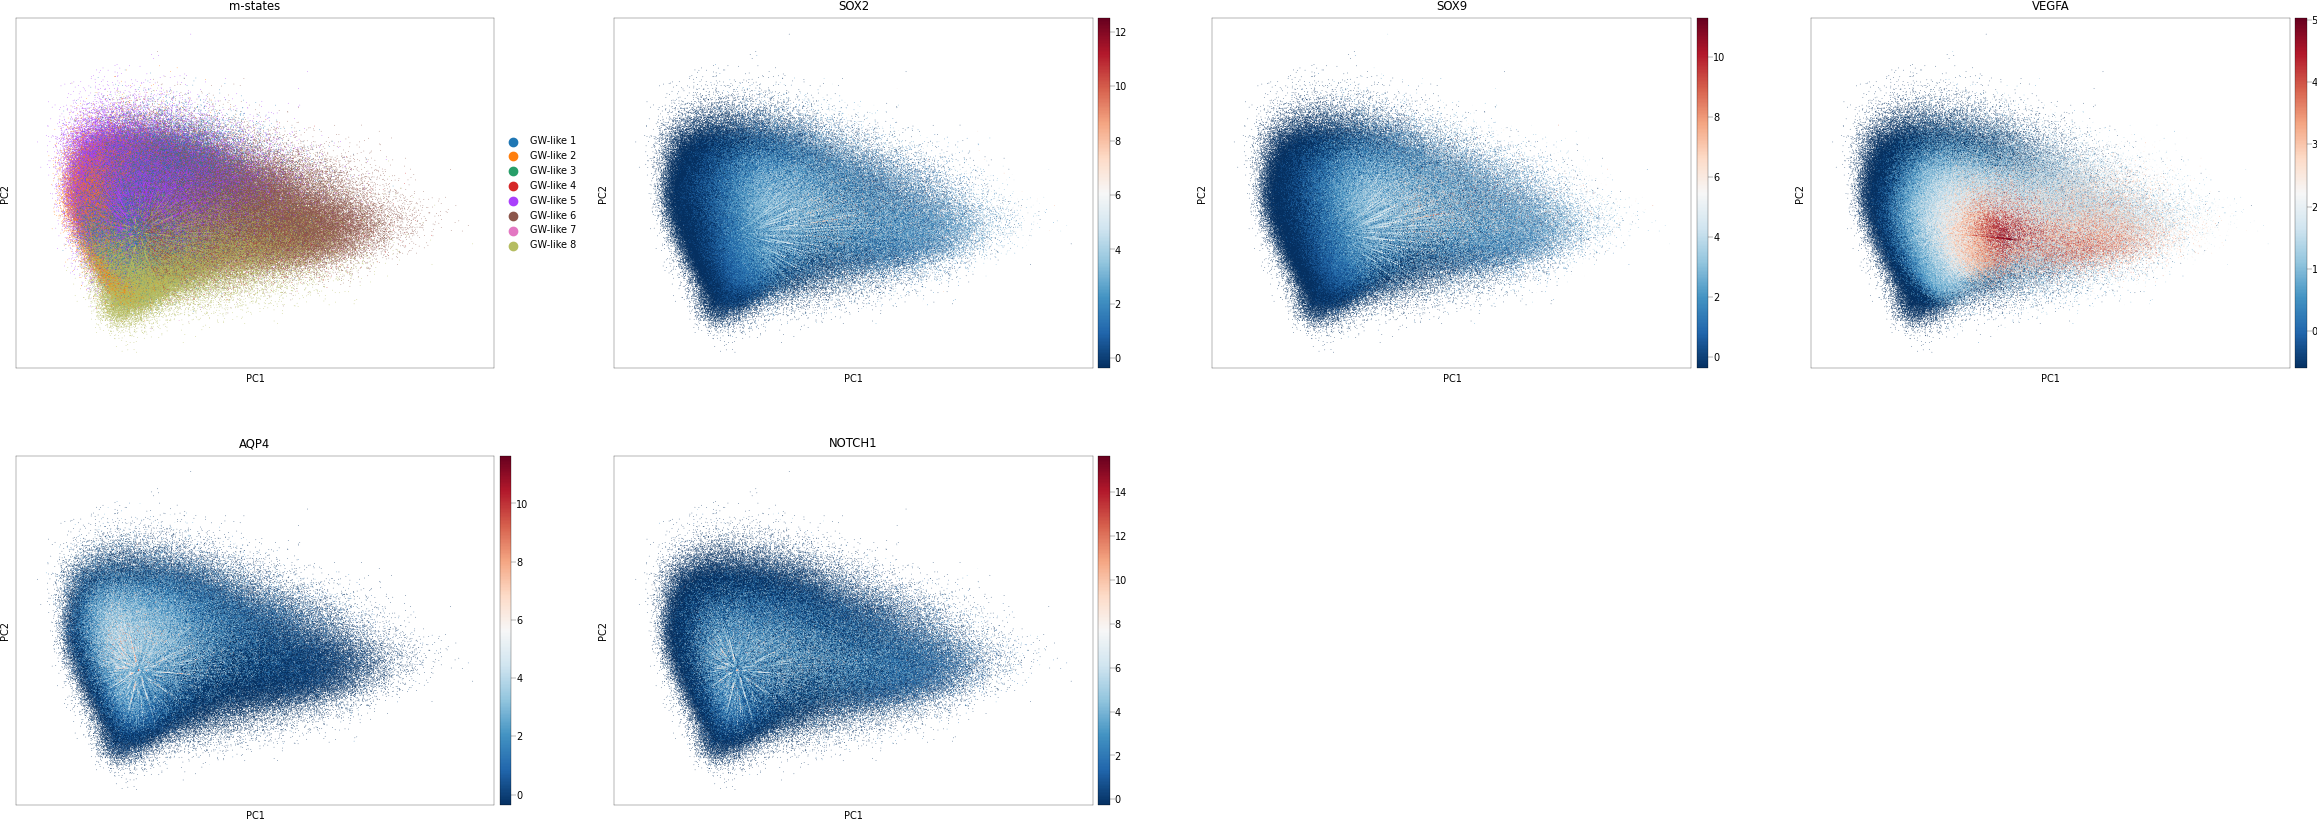

In [15]:
sc.pl.pca(GW, color=['m-states','SOX2','SOX9','VEGFA','AQP4','NOTCH1'],s=1, cmap="RdBu_r",use_raw=False)

# Take a smaller sample for analysis

In [16]:
import scFates as scf
GW

AnnData object with n_obs × n_vars = 984964 × 873
    obs: 'Area', 'CellID', 'Centroid', 'Polygons', 'Sample', 'X', 'Y', 'batch', 'ID', 'CellularNgh', 'm-states', 'm-states80'
    var: 'Accession', 'Gene', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'm-states_colors'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'

In [17]:
#GW_mini = sc.pp.subsample(GW,n_obs=100000,copy=True)

In [18]:
GW_mini = GW

In [19]:
scf.tl.curve(GW_mini, Nodes=20,use_rep="X_pca",ndims_rep=2,epg_mu=.5)


inferring a principal curve --> parameters used 
    20 principal points, mu = 0.5, lambda = 0.01
    finished (0:02:04) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


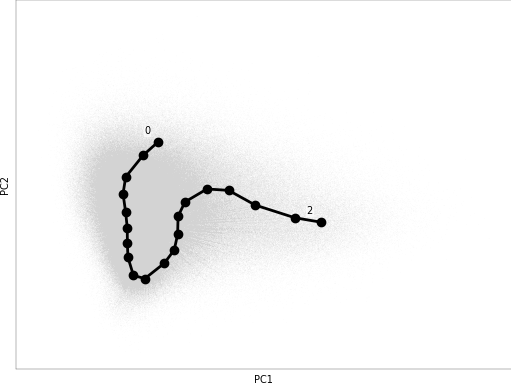

In [20]:
scf.pl.graph(GW_mini,basis="pca")

In [21]:
scf.tl.root(GW_mini,'AQP4')

automatic root selection using AQP4 values
node 0 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [22]:
scf.tl.pseudotime(GW_mini,n_jobs=56,n_map=100,seed=42)

projecting cells onto the principal graph
    mappings: 100%|█████████████████████████████████████████████████████████████████████████| 100/100 [39:56<00:00, 23.97s/it]
    finished (0:45:38) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [ ]:
scf.tl.test_association(GW_mini, n_jobs=56)

reapplied filters, 196 significant features


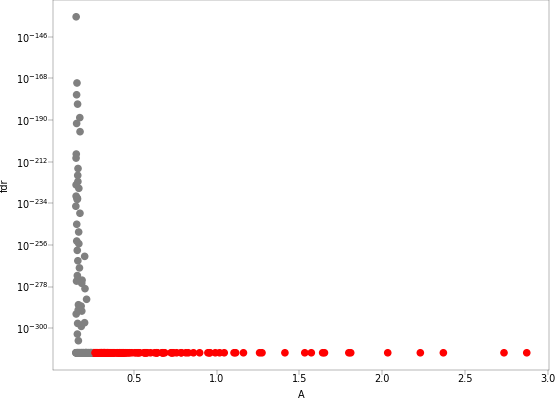

In [44]:
scf.tl.test_association(GW_mini,reapply_filters=True,A_cut=.25)
scf.pl.test_association(GW_mini)


In [45]:
GW_mini.write_h5ad

AnnData object with n_obs × n_vars = 984964 × 387
    obs: 'Area', 'CellID', 'Centroid', 'Polygons', 'Sample', 'X', 'Y', 'batch', 'ID', 'CellularNgh', 'm-states', 'm-states80', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'Accession', 'Gene', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'p_val', 'A', 'fdr', 'st', 'signi', 'clusters'
    uns: 'log1p', 'hvg', 'pca', 'm-states_colors', 'graph', 'epg', 'pseudotime_list', 'milestones_colors', 'seg_colors', 'stat_assoc_list'
    obsm: 'spatial', 'X_pca', 'X_R'
    varm: 'PCs'
    layers: 'fitted'

In [51]:
GW_mini_export = GW_mini.copy()
#del GW_mini_export.uns['graph']
del GW_mini_export.uns['epg']
print('Copied')
GW_mini_export.write_h5ad('GWlike_scfates.h5ad')

Copied


In [ ]:
scf.tl.fit(GW_mini,n_jobs=56)

In [40]:

scf.tl.cluster(GW_mini, n_neighbors=100, metric="correlation")

Clustering features using fitted layer
    finished (0:02:01) --> added 
    .var['clusters'] identified modules.


In [41]:
GW_mini.var['clusters'] = GW_mini.var.clusters.astype('category')
GW_mini.obs['seg'] = GW_mini.obs.seg.astype('category')

In [ ]:
GW_

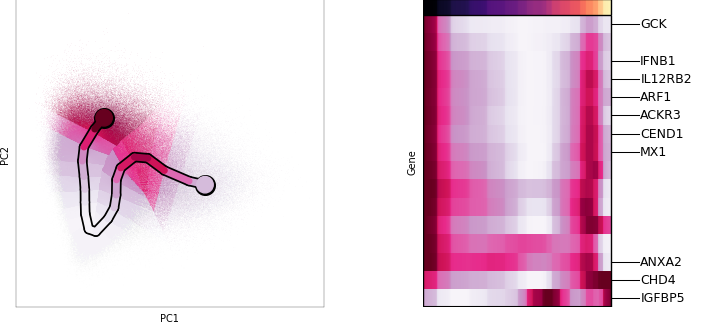

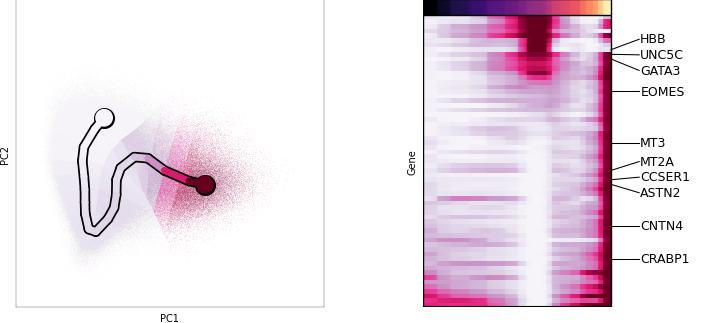

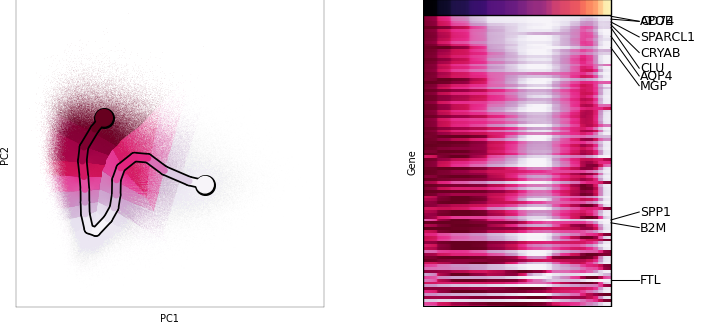

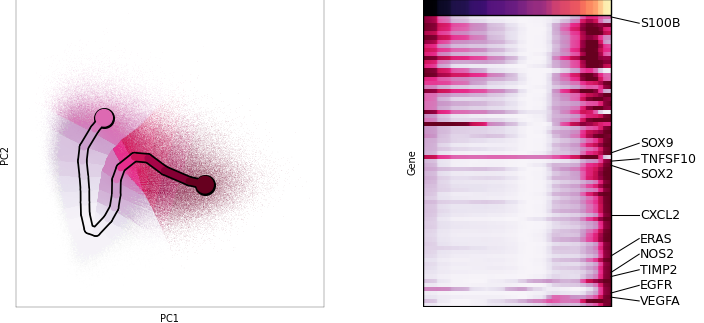

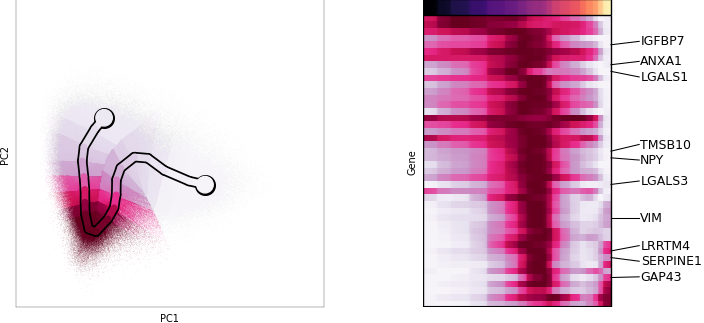

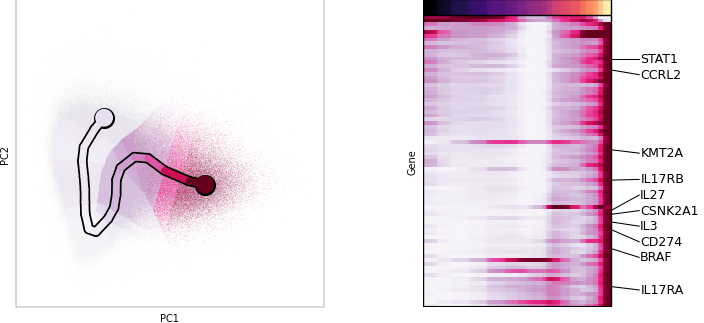

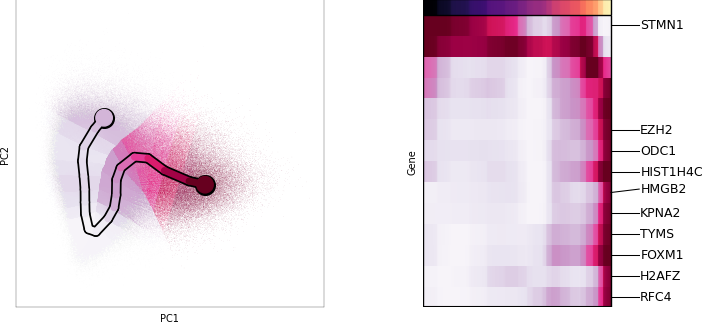

In [43]:
for c in GW_mini.var["clusters"].unique():
    scf.pl.trends(GW_mini,features=GW_mini.var_names[GW_mini.var.clusters==c],basis="pca",feature_cmap='PuRd',
    pseudo_cmap = 'magma',)